# `classification.XGBoostClassifier`

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import slickml

print(f"Loaded SlickML Version = {slickml.__version__}")

Loaded SlickML Version = 0.2.1


In [3]:
from slickml.classification import XGBoostClassifier

help(XGBoostClassifier)

/Users/amirhessam/Desktop/GitHub/slick-ml/.venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Help on class XGBoostClassifier in module slickml.classification._xgboost:

class XGBoostClassifier(slickml.base._estimator.BaseXGBoostEstimator, sklearn.base.ClassifierMixin)
 |  XGBoostClassifier(num_boost_round: Optional[int] = 200, sparse_matrix: Optional[bool] = False, scale_mean: Optional[bool] = False, scale_std: Optional[bool] = False, importance_type: Optional[str] = 'total_gain', params: Optional[Dict[str, Union[str, float, int]]] = None) -> None
 |  
 |  XGBoost Classifier.
 |  
 |  This is a wrapper using XGBoost classifier to train a XGBoost [xgboost-api]_ model using the number of
 |  boosting rounds from the inputs. This is also the base class for ``XGBoostCVClassifier``.
 |  
 |  Parameters
 |  ----------
 |  num_boost_round : int, optional
 |      Number of boosting rounds to fit a model, by default 200
 |  
 |  sparse_matrix : bool, optional
 |      Whether to convert the input features to sparse matrix with csr format or not. This would
 |      increase the speed of 

### Example 1: `XGBoostClassifer` mode for `breast-cancer` data set

In [4]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

data = load_breast_cancer()

X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    shuffle=True,
    stratify=y,
)

In [5]:
# custom params
params = {
    "eval_metric": "logloss",
    "learning_rate": 0.05,
    "max_depth": 2,
    "min_child_weight": 1,
    "gamma": 0.0,
}
clf = XGBoostClassifier(
    num_boost_round=333,
    params=params,
)
clf.fit(X_train, y_train)

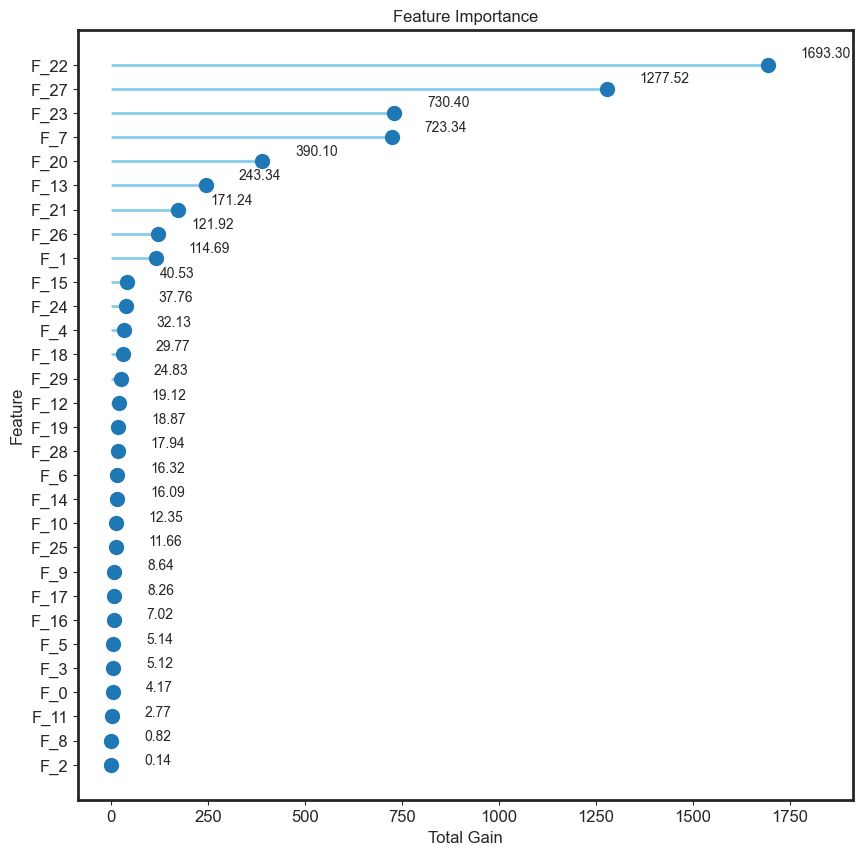

In [6]:
clf.plot_feature_importance(figsize=(10, 10))

In [7]:
# predic proba (or clf.y_pred_proba_)
# please note that y_test is optional
y_pred_proba = clf.predict_proba(X_test, y_test=None)
y_pred_proba[:10]

array([9.9897647e-01, 9.4346196e-04, 1.3501157e-01, 9.9976128e-01,
       3.8310750e-03, 7.2618091e-01, 9.9204880e-01, 5.0860595e-02,
       6.0494919e-04, 9.9980408e-01], dtype=float32)

In [8]:
# pred class (or clf.y_pred_)
# threshold can be set
y_pred = clf.predict(X_test, threshold=0.67)
y_pred[:10]

array([1, 0, 0, 1, 0, 1, 1, 0, 0, 1])

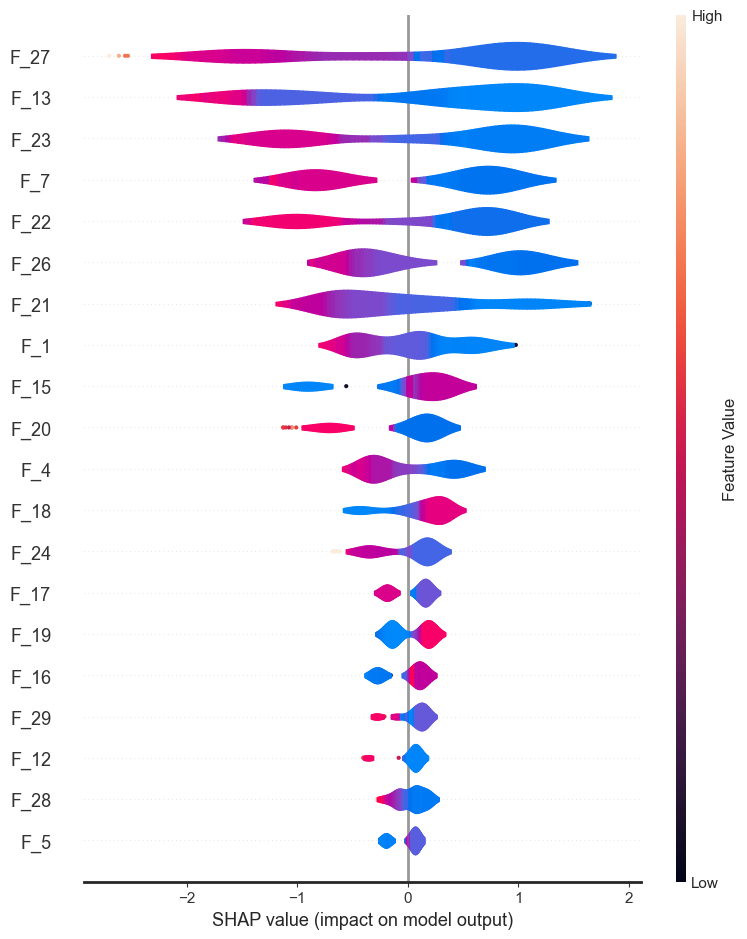

In [9]:
# shap summary plot violin on test data
clf.plot_shap_summary(plot_type="violin", validation=True)

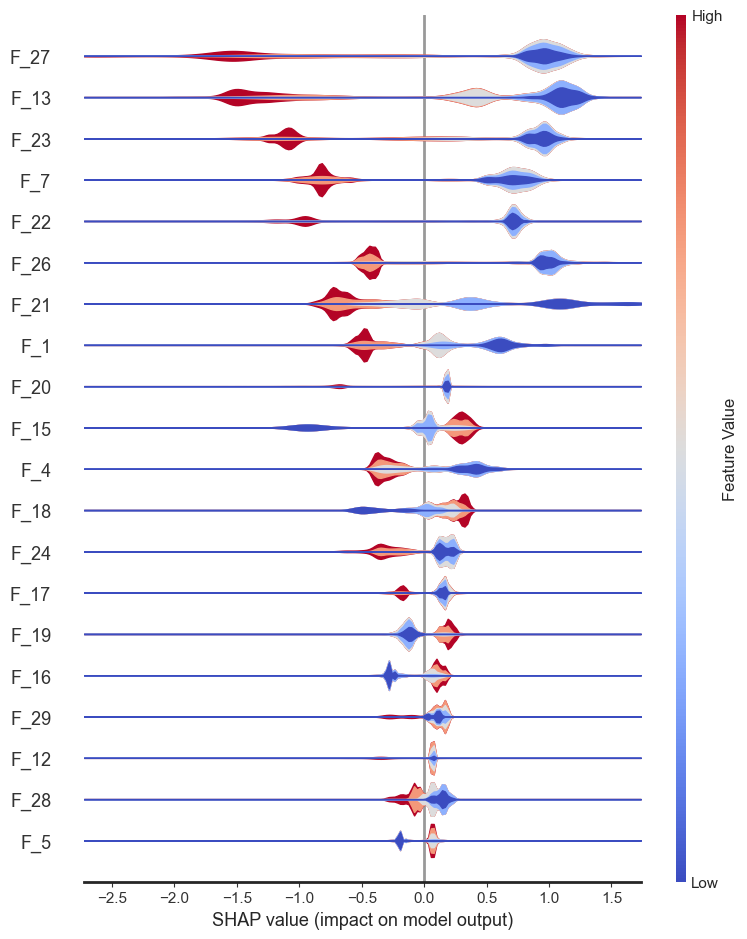

In [10]:
# shap summary plot layered violin plot on train data
clf.plot_shap_summary(
    plot_type="layered_violin",
    validation=False,
    layered_violin_max_num_bins=5,
)

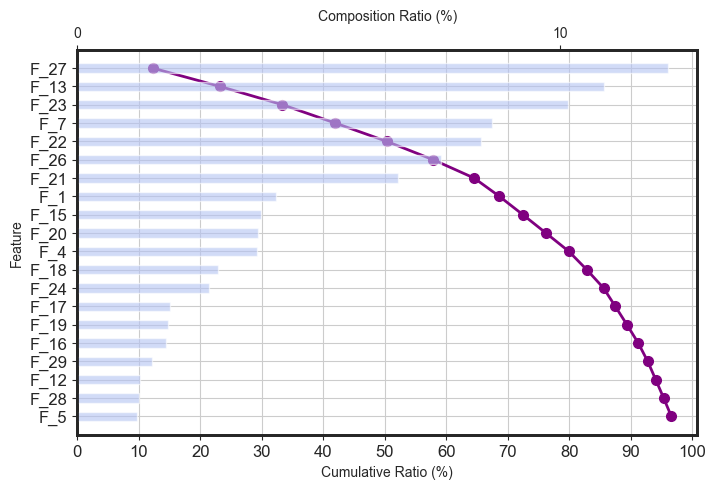

In [11]:
# shap waterfall plot
clf.plot_shap_waterfall()

In [12]:
clf.shap_values_test_[:10]

array([[-1.46889649e-02, -1.87673241e-01, -3.42416880e-03,
        -3.17105092e-04, -2.97253847e-01,  9.07315910e-02,
         4.17442396e-02,  9.08680975e-01,  1.81743018e-02,
         8.47922713e-02,  1.99260749e-02,  1.04893465e-04,
         5.82570992e-02,  9.23794568e-01,  2.03489419e-02,
         4.50210989e-01,  1.74758479e-01, -1.82553917e-01,
         3.32719237e-01,  2.44647965e-01,  1.90528899e-01,
        -1.09553084e-01,  7.55549610e-01,  1.09199321e+00,
         1.91947579e-01,  3.45856734e-02, -1.14404961e-01,
         1.09891486e+00,  1.02017544e-01,  1.71379074e-01],
       [-3.63357225e-03,  1.32116646e-01,  6.25137100e-03,
        -2.88628992e-02, -3.78483921e-01,  4.90051322e-02,
        -4.20690812e-02, -7.63102651e-01,  2.24305317e-02,
         2.85327267e-02, -5.88151105e-02,  1.11335590e-02,
        -3.63980800e-01, -1.61990213e+00,  6.63035829e-03,
         8.35136026e-02,  8.84520784e-02, -2.30042294e-01,
         5.83489276e-02,  1.49057508e-01, -7.39641130e-

In [13]:
clf.shap_values_train_[:10]

array([[ 2.51547750e-02, -5.23782313e-01,  6.25137100e-03,
         2.65563112e-02, -3.04433316e-01,  4.43639420e-02,
        -4.75821197e-02, -9.45892334e-01,  9.12449323e-03,
         6.81306124e-02,  4.90904553e-03,  9.48395580e-03,
         4.75629456e-02,  7.92986274e-01,  3.14347586e-03,
         2.18229026e-01,  5.85220680e-02, -1.54339224e-01,
        -7.28032812e-02,  1.23246744e-01, -2.59924699e-02,
        -8.10984790e-01, -9.81300056e-01, -1.05373895e+00,
        -3.34378302e-01, -7.61390403e-02, -4.87455785e-01,
        -1.90590489e+00, -2.79547989e-01, -3.15238059e-01],
       [-2.19527055e-02,  7.55085826e-01, -3.42416880e-03,
        -5.75375929e-03, -2.55699962e-01,  7.74066746e-02,
        -6.12011850e-02, -7.77840018e-01,  2.24305317e-02,
         5.18349968e-02, -5.88151105e-02, -3.74514088e-02,
         5.67244105e-02, -1.18333244e+00,  1.21741612e-02,
         3.01534653e-01,  1.33172676e-01, -1.67769164e-01,
         3.59777391e-01,  2.39679515e-01,  1.62689179e-

In [14]:
# feature importance (or clf.feature_importance_)
clf.get_feature_importance()

,feature,total_gain
0,F_22,1693.304565
1,F_27,1277.515381
2,F_23,730.395142
3,F_7,723.335815
4,F_20,390.102112
5,F_13,243.338745
6,F_21,171.237152
7,F_26,121.915169
8,F_1,114.686691
9,F_15,40.529953


In [15]:
clf.model_

## You can use the `BinaryClassificationMetrics` class to evaluate your model

In [16]:
from slickml.metrics import BinaryClassificationMetrics

metrics = BinaryClassificationMetrics(y_test, y_pred_proba)

/Users/amirhessam/Desktop/GitHub/slick-ml/.venv/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:993: FutureWarning: probas_pred was deprecated in version 1.5 and will be removed in 1.7.Please use ``y_score`` instead.
  warnings.warn(


,Accuracy,Balanced Accuracy,ROC AUC,PR AUC,Precision,Recall,Average Precision,F-1 Score,F-2 Score,F-0.50 Score,Threat Score,TP,TN,FP,FN
Threshold = 0.500 | Average = Binary,0.971000,0.970000,0.993000,0.995000,0.981000,0.972000,0.995000,0.977000,0.974000,0.979000,0.954000,104,62,2,3


/Users/amirhessam/Desktop/GitHub/slick-ml/.venv/lib/python3.9/site-packages/numpy/core/function_base.py:158: RuntimeWarning: invalid value encountered in multiply
  y *= step


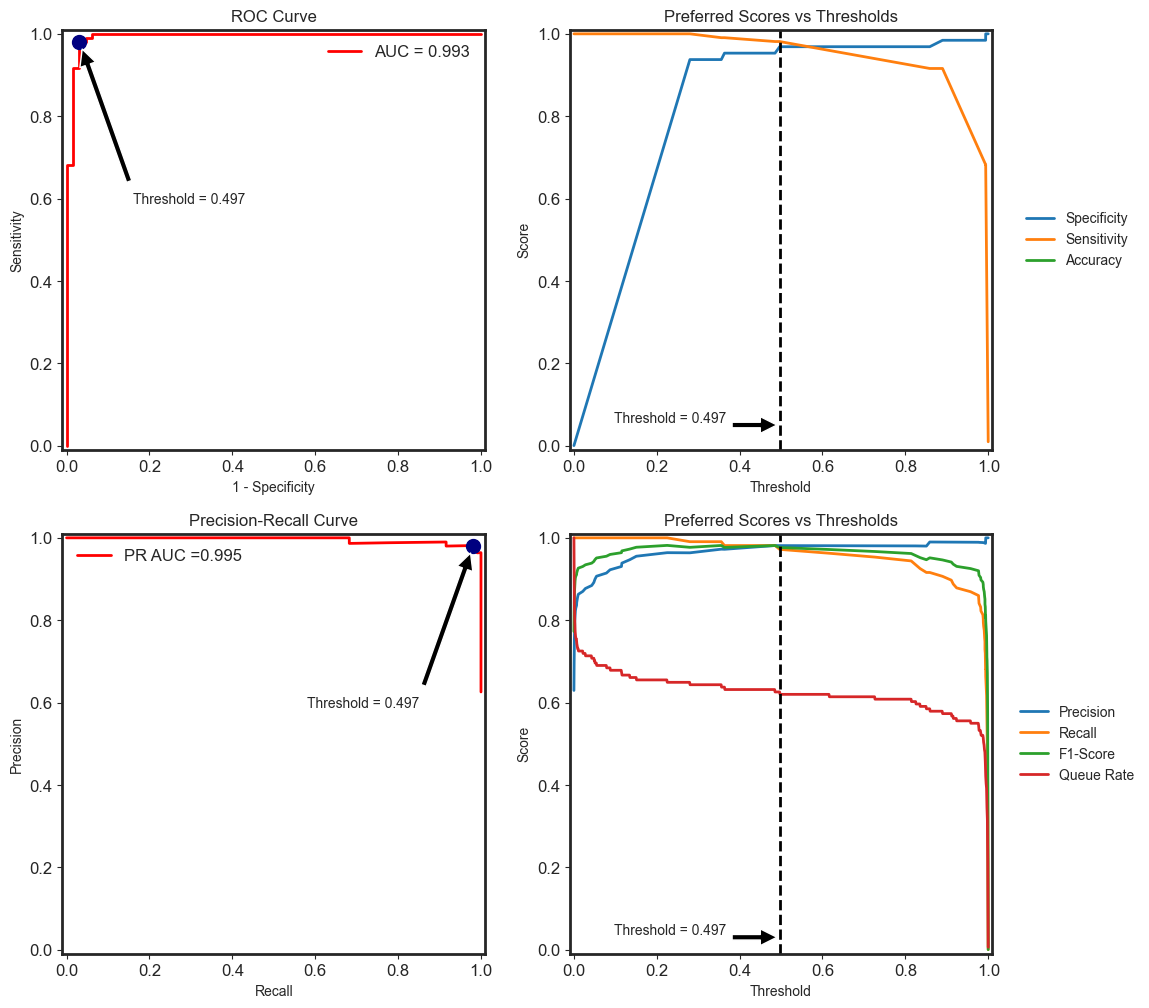

In [17]:
metrics.plot()

### Feel free to add your favorite `Example` via a `pull-request`.
### More details can be found in our [Contributing Document](https://github.com/slickml/slick-ml/blob/master/CONTRIBUTING.md).